In [4]:
import numpy as np 

x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [6]:
x[0].shape

(1, 28, 28)

In [7]:
x[1].shape

(1, 28, 28)

In [8]:
x[0, 0]

array([[0.36219248, 0.22197811, 0.34433574, 0.9865006 , 0.87876886,
        0.0699013 , 0.06080222, 0.29899482, 0.48004087, 0.02977771,
        0.62343239, 0.21699433, 0.45771038, 0.03725692, 0.90103636,
        0.30424666, 0.09478219, 0.02688751, 0.64507554, 0.95130156,
        0.70440037, 0.31070964, 0.67505492, 0.84579266, 0.07077881,
        0.34875943, 0.89753879, 0.92350047],
       [0.26040641, 0.6864873 , 0.86505323, 0.5080419 , 0.50246864,
        0.02230003, 0.8731537 , 0.70054272, 0.10325551, 0.99174476,
        0.65380435, 0.72837636, 0.06345839, 0.75993036, 0.29595811,
        0.30342928, 0.0994953 , 0.03936153, 0.20919747, 0.16166553,
        0.10930699, 0.04689067, 0.45292636, 0.22500049, 0.1422863 ,
        0.13489995, 0.07362477, 0.31216686],
       [0.647324  , 0.15956331, 0.5324695 , 0.1797269 , 0.58682526,
        0.62415807, 0.22447639, 0.84509605, 0.68692629, 0.19921324,
        0.54901453, 0.87187655, 0.12270746, 0.94992805, 0.01563639,
        0.59822275, 0.2127

In [10]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) # (9, 75)


x2 = np.random.rand(10, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)

(9, 75)
(90, 75)


In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=2, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

train loss:2.2993584810170056
=== epoch:1, train acc:0.211, test acc:0.263 ===
train loss:2.2973067255802047
train loss:2.2928070373676244
train loss:2.2882520750082342
train loss:2.279968771003474
train loss:2.266013548764573
train loss:2.2483173210295537
train loss:2.229114968261498
train loss:2.2144311769476035
train loss:2.1989865813146294
train loss:2.132839440020116
train loss:2.120046903539519
train loss:2.066370409983871
train loss:2.0408318761896367
train loss:1.9931523743232982
train loss:1.9346978516569369
train loss:1.8612973204748195
train loss:1.7325785414061585
train loss:1.7223909654424334
train loss:1.6726682615192687
train loss:1.4893449167526795
train loss:1.3960683429679266
train loss:1.3714023858405349
train loss:1.3650269540826334
train loss:1.200281811184321
train loss:1.1684039572173988
train loss:1.064112210861803
train loss:0.9187067821337354
train loss:0.9409098550636772
train loss:0.9582821845634577
train loss:1.1342741119389848
train loss:0.8233274108076201

train loss:0.20633421434309976
train loss:0.2166588690100918
train loss:0.1915460417905063
train loss:0.2138653001819042
train loss:0.10291892750537965
train loss:0.14938791587645392
train loss:0.2645839826765279
train loss:0.17211836334130623
train loss:0.2478808602364666
train loss:0.12510164632254822
train loss:0.20376621998456282
train loss:0.22320804260915172
train loss:0.17559250318044228
train loss:0.2797641784059763
train loss:0.25976718722849934
train loss:0.1279841079919756
train loss:0.20361032663684475
train loss:0.13957827497194494
train loss:0.17146084403993014
train loss:0.1814203479242275
train loss:0.2173224245789308
train loss:0.2750911450682449
train loss:0.18445744228555963
train loss:0.12452624552485726
train loss:0.18849349658057968
train loss:0.2650850294608735
train loss:0.1518380509159147
train loss:0.22298406680212196
train loss:0.19227323946163236
train loss:0.2538832987180509
train loss:0.19073594525140294
train loss:0.1491918982678996
train loss:0.177436234

train loss:0.17062722995947607
train loss:0.14584616176242451
train loss:0.1318182656481328
train loss:0.04234458934240151
train loss:0.11166776745177172
train loss:0.14090361469199592
train loss:0.16398683553606097
train loss:0.17463861345653625
train loss:0.14352165596302893
train loss:0.20511527399002397
train loss:0.13671043250078935
train loss:0.16429202607133192
train loss:0.16168519860361702
train loss:0.12526449495668518
train loss:0.1101432939152049
train loss:0.10849909908989525
train loss:0.13408655818413714
train loss:0.098080855317695
train loss:0.1270937565324247
train loss:0.09021154730360395
train loss:0.04298243777623733
train loss:0.10993912356987323
train loss:0.1543480793124154
train loss:0.12786773652701494
train loss:0.1368757225416576
train loss:0.07335827445344477
train loss:0.06562843132361477
train loss:0.1128356431095364
train loss:0.13415620857234864
train loss:0.20504063086843233
train loss:0.07342415376247467
train loss:0.1517519004303143
train loss:0.1887

train loss:0.17282822693974623
train loss:0.15338160694321612
train loss:0.0789205713811634
train loss:0.09504327898959136
train loss:0.04360479770059588
train loss:0.11027523609437187
train loss:0.09632759407776842
train loss:0.06899187298193217
train loss:0.06692977021854724
train loss:0.1012580359347195
train loss:0.10517000652949808
train loss:0.09329386120060644
train loss:0.06557052273562503
train loss:0.06147967911096571
train loss:0.09541984732222937
train loss:0.05178878230451033
train loss:0.08757249754700065
train loss:0.05113547840413063
train loss:0.04252235640660669
train loss:0.10167655128138214
train loss:0.18831040435052476
train loss:0.04895901180286951
train loss:0.0635693675191728
train loss:0.12428939638127127
train loss:0.10379318732171815
train loss:0.05929154271904066
train loss:0.18622437840060804
train loss:0.07755027041860005
train loss:0.03338056425099022
train loss:0.08150944874983178
train loss:0.10568903261193402
train loss:0.049685618738501296
train loss

train loss:0.02707803618634043
train loss:0.0529094123462433
train loss:0.04159638813013055
train loss:0.05830184897162542
train loss:0.10042199041666834
train loss:0.032405136903095426
train loss:0.12751186377747165
train loss:0.03076883399071677
train loss:0.06243533535547201
train loss:0.07198696641496741
train loss:0.07910926761395355
train loss:0.038025699013331346
train loss:0.179828050952538
train loss:0.07599941043927973
train loss:0.008449309388560117
train loss:0.08473529028880977
train loss:0.11440390429861104
train loss:0.06765866238850134
train loss:0.08860649951093723
train loss:0.139362170445871
train loss:0.1382792176968649
train loss:0.048622476216030025
train loss:0.05870428415781435
train loss:0.10194278111615855
train loss:0.08456430284075532
train loss:0.07032096687634358
train loss:0.061644068927686604
train loss:0.11932763225530424
train loss:0.09279093025273774
train loss:0.031242805679499507
train loss:0.06738425094205165
train loss:0.03323290663673484
train lo

train loss:0.053741281336741234
train loss:0.03289859364596867
train loss:0.06007925950121137
train loss:0.084531851080796
train loss:0.020276838130710836
train loss:0.03415655613155332
train loss:0.026742730577532386
train loss:0.04173794100231783
train loss:0.025218939398188183
train loss:0.041336847379078195
train loss:0.0453646211769173
train loss:0.06187275089257722
train loss:0.03253253673429899
train loss:0.04937085435983699
train loss:0.02307796800981419
train loss:0.06253470576851224
train loss:0.018936068452576473
train loss:0.12005666404794796
train loss:0.05291253169742182
train loss:0.04712853774915098
train loss:0.06509048389651602
train loss:0.046409370988152246
train loss:0.10717478046546187
train loss:0.06084304624294602
train loss:0.05617456249552069
train loss:0.03235181387881933
train loss:0.051306990278430276
train loss:0.06445895349789102
train loss:0.0665895243619417
train loss:0.04965282273016974
train loss:0.0411690139030735
train loss:0.02386636750239772
train

train loss:0.030753255796300002
train loss:0.06928742724107324
train loss:0.1014914003679843
train loss:0.03207958653094183
train loss:0.04304633150098725
train loss:0.020041568338991227
train loss:0.028414338619060727
train loss:0.1700913153962983
train loss:0.03737677142547591
train loss:0.07085801306478261
train loss:0.033986016753828084
train loss:0.07579988025331677
train loss:0.0182803479049988
train loss:0.030941162047830834
train loss:0.009845135767438437
train loss:0.02492049993121913
train loss:0.03028605605207489
train loss:0.012236345033619296
train loss:0.026744534204768376
train loss:0.0875876892222312
train loss:0.017183143157198866
train loss:0.03478399633828619
train loss:0.060938825294618
train loss:0.031025073972532374
train loss:0.0797972218245321
train loss:0.034565461447691445
train loss:0.052491255098103144
train loss:0.038641939261564014
train loss:0.028668835560006392
train loss:0.03772828113389149
train loss:0.04678907953477116
train loss:0.06792553719206271
t

train loss:0.020838685443700905
train loss:0.07432740430516366
train loss:0.015194327290013212
train loss:0.024281386473239245
train loss:0.043531123748881614
train loss:0.032969888062036275
train loss:0.05189628004642002
train loss:0.017848185662065225
train loss:0.031658926333536494
train loss:0.04069640126740966
train loss:0.03065745576468314
train loss:0.07945054910003767
train loss:0.09970037802957574
train loss:0.0828012410570885
train loss:0.0596171286287986
train loss:0.011478953606337874
train loss:0.02410199189649243
train loss:0.08103425481732568
train loss:0.05065437024839648
train loss:0.02744241642686621
train loss:0.029944475057104503
train loss:0.057911670369917866
train loss:0.03306695807927005
train loss:0.016435117458165734
train loss:0.028461260272540288
train loss:0.058591790789183376
train loss:0.0179303985814501
train loss:0.0641684655620226
train loss:0.018308541091823366
train loss:0.05348608808117827
train loss:0.03485981519777398
train loss:0.0194557101179906

train loss:0.004712733082014473
train loss:0.05089089300399456
train loss:0.0428671894602046
train loss:0.06455735319425858
train loss:0.028198803348197986
train loss:0.02476034241458268
train loss:0.01784945822926987
train loss:0.022151008727324988
train loss:0.030034760122776075
train loss:0.01037860766521247
train loss:0.034074213893787654
train loss:0.10932376439121326
train loss:0.015264496728428263
train loss:0.02700515588023618
train loss:0.0204313584606058
train loss:0.1059111317591094
train loss:0.05799739152447226
train loss:0.01297471402152647
train loss:0.012777510722111024
train loss:0.06766381632742248
train loss:0.013095694233723294
train loss:0.018022362121862236
train loss:0.013791913681538832
train loss:0.02538073159060454
train loss:0.02062143045414263
train loss:0.025963640951976057
train loss:0.021100313929068214
train loss:0.016296387870102482
train loss:0.01906546866911753
train loss:0.13018439865233764
train loss:0.025514294125573107
train loss:0.021827670438512

train loss:0.04017329468721711
train loss:0.0067740597887050715
train loss:0.11872103625244534
train loss:0.06747121576074132
train loss:0.05159720835067778
train loss:0.024949277954938825
train loss:0.03492085351020328
train loss:0.02421225514313473
train loss:0.037278577127569365
train loss:0.06153915392528453
train loss:0.023812902689725742
train loss:0.03344368359497623
train loss:0.06062101670209783
train loss:0.05807385392770487
train loss:0.05665920262361219
train loss:0.01625563120559143
train loss:0.024688296248777143
train loss:0.059963326265546
train loss:0.01808291007502265
train loss:0.0555852771696438
train loss:0.037456436075538314
train loss:0.06482522519144306
train loss:0.054790060621149286
train loss:0.04804727265994417
=== epoch:5, train acc:0.986, test acc:0.982 ===
train loss:0.020639564666662814
train loss:0.06777653378445414
train loss:0.033633488531358814
train loss:0.005488552178329557
train loss:0.019024897871648676
train loss:0.18127416646819736
train loss:0

train loss:0.005568149212948933
train loss:0.004284485710172815
train loss:0.020464217956223992
train loss:0.018760999306553637
train loss:0.00642779311169862
train loss:0.01676499061541801
train loss:0.017899797253623836
train loss:0.013175385913688206
train loss:0.04687942466441859
train loss:0.025164570388501083
train loss:0.044349107558559336
train loss:0.06860490118082335
train loss:0.009714890312108775
train loss:0.01664864798222044
train loss:0.018217272752855306
train loss:0.02570665452212301
train loss:0.015198656595623562
train loss:0.03753096220052418
train loss:0.07845101464886575
train loss:0.025803514251832905
train loss:0.025033652077318877
train loss:0.018813192982186998
train loss:0.012512675832458922
train loss:0.02226849400551685
train loss:0.11071585724532779
train loss:0.018472592338161887
train loss:0.02010687013167796
train loss:0.03993382746576174
train loss:0.030744010001090172
train loss:0.0033204718254910516
train loss:0.013950751396605437
train loss:0.013054

train loss:0.05918860778425153
train loss:0.0061848236490574336
train loss:0.036032097025280076
train loss:0.020713410152059474
train loss:0.015006935173751528
train loss:0.06108271214506358
train loss:0.044173253065855345
train loss:0.02877780397221205
train loss:0.022093080697083826
train loss:0.007579689157381668
train loss:0.00907174622213919
train loss:0.05995368639570861
train loss:0.01693540300417426
train loss:0.01025729183489326
train loss:0.033247733954523885
train loss:0.03088511485890576
train loss:0.03743441069383477
train loss:0.04659371815406089
train loss:0.03478011062579666
train loss:0.030116694099886397
train loss:0.008671683538880365
train loss:0.09846372834289623
train loss:0.002402041920621601
train loss:0.13254606357654458
train loss:0.03668042383031147
train loss:0.013588806146029643
train loss:0.03592910908162959
train loss:0.006122786376705737
train loss:0.005497413062069734
train loss:0.006987025012050673
train loss:0.008982399082243244
train loss:0.015916261

train loss:0.012652034315039404
train loss:0.041671756057437344
train loss:0.023461616231379986
train loss:0.002018103897854666
train loss:0.007168795922156531
train loss:0.05467322090729963
train loss:0.010933443878150137
train loss:0.004409181030263786
train loss:0.08076772600780661
train loss:0.007589187184699562
train loss:0.016629704143459403
train loss:0.11377163629390781
train loss:0.018928169517903413
train loss:0.015777913060058196
train loss:0.030572914331065203
train loss:0.015238289275133442
train loss:0.006619476057226922
train loss:0.058736104989997345
train loss:0.007945117264573117
train loss:0.04600650006036929
train loss:0.012113279632312539
train loss:0.019812980267641223
train loss:0.006491525082881474
train loss:0.06533838914287685
train loss:0.0069908778492956914
train loss:0.020647542585504525
train loss:0.0257311881173775
train loss:0.018515058680845332
train loss:0.0013053563094550973
train loss:0.004395552683787903
train loss:0.014106895660028103
train loss:0.

train loss:0.0028137828216393845
train loss:0.0029548939226919685
train loss:0.02605668538204811
train loss:0.05571897568946388
train loss:0.04474364544062384
train loss:0.012624643220141054
train loss:0.007104294212170967
train loss:0.011676552421800166
train loss:0.010640878344089952
train loss:0.01401901143928217
train loss:0.009306014736998318
train loss:0.0126048020099047
train loss:0.001364566399399166
train loss:0.023196480115205767
train loss:0.008554439061145787
train loss:0.004921533141505133
train loss:0.004322398199767958
train loss:0.021216353774640654
train loss:0.013917563752030689
train loss:0.020767101187496043
train loss:0.013932699701697939
train loss:0.06931762362601435
train loss:0.01657020613510193
train loss:0.0022630963912800635
train loss:0.012633074000961433
train loss:0.013897200441796773
train loss:0.024718877748797025
train loss:0.00841085157689397
train loss:0.0035655597701768293
train loss:0.004785799262986703
train loss:0.02466627284941851
train loss:0.0

train loss:0.004845110810451282
train loss:0.005290020090576485
train loss:0.007623016383083232
train loss:0.004526637984279716
train loss:0.05236053842586826
train loss:0.014462761196391562
train loss:0.022628868605077873
train loss:0.015813729500043564
train loss:0.0055100393378493175
train loss:0.004226593599015398
train loss:0.04433579819451046
train loss:0.02618958892612693
train loss:0.014687368894060642
train loss:0.02039418783893717
train loss:0.010053180735403901
train loss:0.012393303743456993
train loss:0.0035050605805108798
train loss:0.01857998347467126
train loss:0.005388544543968904
train loss:0.016988284739977825
train loss:0.007044572257977064
train loss:0.007782621598877593
train loss:0.00370964153985129
train loss:0.034467400822137416
train loss:0.0037881037490420334
train loss:0.008710189315632668
train loss:0.011104271941658446
train loss:0.010307736444230322
train loss:0.0360530712845247
train loss:0.09881898251487417
train loss:0.006828220908470322
train loss:0.0

train loss:0.015249154823892148
train loss:0.04196209241275061
train loss:0.007149355339542952
train loss:0.027093345078446567
train loss:0.016544688646065196
train loss:0.029131159658538158
train loss:0.013937632920506012
train loss:0.01554255160677872
train loss:0.0048387427787038315
train loss:0.007833022507330865
train loss:0.010011637396880815
train loss:0.05135915345806596
train loss:0.007995576981066881
train loss:0.008421816571649863
train loss:0.024344448936497384
train loss:0.011862701951104303
train loss:0.011866405010348644
train loss:0.0015502992358010876
train loss:0.018781286357048132
train loss:0.0073306805158365185
train loss:0.028755264139355585
train loss:0.00503802551515042
train loss:0.019349306490025298
train loss:0.027069260669907325
train loss:0.008915108010522442
train loss:0.006289366697069824
train loss:0.009952987318502826
train loss:0.01830182004970793
train loss:0.009109828935730546
train loss:0.010562280893777752
train loss:0.027574740937372427
train loss

train loss:0.11087351374414181
train loss:0.041909656871172186
train loss:0.007824453989210172
train loss:0.008058065693621753
train loss:0.0433228233341629
train loss:0.01168764761174861
train loss:0.007763859302710297
train loss:0.01412519581991517
train loss:0.020152501064421378
train loss:0.016107882855942245
train loss:0.01043942335083491
train loss:0.009455089294834091
train loss:0.009992206384228597
train loss:0.009314707047808832
=== epoch:8, train acc:0.991, test acc:0.984 ===
train loss:0.0003110734234459044
train loss:0.023528716983253605
train loss:0.003559976859887713
train loss:0.00655727195985772
train loss:0.044707101171963845
train loss:0.0023636359485573613
train loss:0.0014913148076199751
train loss:0.0053753727714545155
train loss:0.0053451375272923094
train loss:0.007077511996752638
train loss:0.02406607409105236
train loss:0.021570608922504935
train loss:0.007786988627834328
train loss:0.018924891873900892
train loss:0.016302070991882175
train loss:0.0043280885548

train loss:0.006863218182409718
train loss:0.015168802146810071
train loss:0.006445073566049147
train loss:0.004614394427817538
train loss:0.003426183746162181
train loss:0.005278728852449157
train loss:0.00927253243920876
train loss:0.003221972619695555
train loss:0.030616794421017474
train loss:0.004302321168840119
train loss:0.0030298343584302186
train loss:0.008016608375987822
train loss:0.008055515589634967
train loss:0.0028359884334548413
train loss:0.008416250656324032
train loss:0.03368735523316309
train loss:0.0021184971752357166
train loss:0.001012973223791374
train loss:0.0028101453575014807
train loss:0.009227157744648514
train loss:0.005026154484133484
train loss:0.007503735515118063
train loss:0.008982531512281488
train loss:0.02269770305729492
train loss:0.016747796547224417
train loss:0.009723446157218185
train loss:0.023091810236130415
train loss:0.0013885944508299282
train loss:0.011440827092020697
train loss:0.003717961344432115
train loss:0.008045665581628399
train 

train loss:0.03544493322758038
train loss:0.024121799325290384
train loss:0.022635123654741362
train loss:0.013278691654034945
train loss:0.010031093341083598
train loss:0.005721508343128895
train loss:0.012291518606118365
train loss:0.0026178112945544475
train loss:0.012185695621938586
train loss:0.0015983771937770808
train loss:0.00140310315466643
train loss:0.003694601909298521
train loss:0.021101961990132576
train loss:0.012011500771763509
train loss:0.034894879896191874
train loss:0.018421826311002094
train loss:0.014597199156063693
train loss:0.011702096913315963
train loss:0.010406821062643994
train loss:0.011720396209242145
train loss:0.002805790641819646
train loss:0.004338326609260939
train loss:0.007521793971672074
train loss:0.008052410396004807
train loss:0.0029861914647015047
train loss:0.049645798938903696
train loss:0.01838968890110659
train loss:0.015845947559689304
train loss:0.031471121825614574
train loss:0.008085460102385852
train loss:0.008677134254908615
train lo

train loss:0.004297128332250749
train loss:0.010074961409500267
train loss:0.0305706396542815
train loss:0.003945821203318595
train loss:0.02416322273477805
train loss:0.0257027053322649
train loss:0.024689105126764855
train loss:0.017235408787591857
train loss:0.002606500898094244
train loss:0.002080075275701488
train loss:0.008658166902896367
train loss:0.0147458741962865
train loss:0.01637803698445767
train loss:0.010344387748621713
train loss:0.0010109142965525671
train loss:0.02149932109233128
train loss:0.014094989697483663
train loss:0.003404889979383459
train loss:0.01623157880191981
train loss:0.001643472545472992
train loss:0.003255019181467438
train loss:0.010204069752546807
train loss:0.005025262110914486
train loss:0.0008311639688741126
train loss:0.005987849378979884
train loss:0.023863636426238618
train loss:0.00903380566969991
train loss:0.0098175793940109
train loss:0.0034542018817436113
train loss:0.0026683058075361553
train loss:0.004349864124866653
train loss:0.0673

train loss:0.00734468770373147
train loss:0.032607460938314875
train loss:0.014461313922869375
train loss:0.0004644650122834698
train loss:0.0018812899365583328
train loss:0.008598730116870568
train loss:0.00405470104176559
train loss:0.006464211737405728
train loss:0.002873932754105168
train loss:0.0026548291706844714
train loss:0.164618587501582
train loss:0.006333159917320086
train loss:0.0024677512444462603
train loss:0.02409866057605915
train loss:0.05910843525782178
train loss:0.006300833979992076
train loss:0.0046765418803390475
train loss:0.002473865494201378
train loss:0.003663469971932145
train loss:0.0045833696838055715
train loss:0.04051096106182039
train loss:0.006152621396898052
train loss:0.003157358702128135
train loss:0.0015549347630315195
train loss:0.022488895874166966
train loss:0.0099589755646247
train loss:0.029037991858028203
train loss:0.004819997570113161
train loss:0.00840015744225141
train loss:0.009337732888888617
train loss:0.002600608898678711
train loss:0

train loss:0.003683992861979834
train loss:0.0033359955074209226
train loss:0.0063862407640299015
train loss:0.002186997357880662
train loss:0.005740603843690239
train loss:0.002118512540528007
train loss:0.00570686133716981
train loss:0.0001945849405753506
train loss:0.0021076362562040506
train loss:0.003867653783617393
train loss:0.001902158091964408
train loss:0.0023556324645411875
train loss:0.020006618880125927
train loss:0.002079395407755078
train loss:0.005193295469710635
train loss:0.007078981282913277
train loss:0.003568136101789252
train loss:0.0034970323700099742
train loss:0.0013246135014100408
train loss:0.0032903209582979052
train loss:0.0013242898470810702
train loss:0.0019728872784791174
train loss:0.002631305692194354
train loss:0.013982735672008978
train loss:0.005351722987310768
train loss:0.005321184241692605
train loss:0.005971034190182597
train loss:0.020175460605984904
train loss:0.01047318942252831
train loss:0.001544331100509416
train loss:0.0025091622556887854

train loss:0.00720015803607513
train loss:0.0020883735873035015
train loss:0.0014073447778026403
train loss:0.010908739706849725
train loss:0.004960598738800193
train loss:0.0063862146196315105
train loss:0.001203429573088214
train loss:0.0005608797177531315
train loss:0.01857683042595471
train loss:0.000689045180210957
train loss:0.003640335304333591
train loss:0.05513804567763512
train loss:0.006796845986069226
train loss:0.0004199606756076402
train loss:0.011109864986428202
train loss:0.0012129308799864336
train loss:0.012927815266368093
train loss:0.015437819696660932
train loss:0.017905174764576683
train loss:0.007976547960750351
train loss:0.009537591293212836
train loss:0.0048390938164172255
train loss:0.009908963982093712
train loss:0.0054883133283351974
train loss:0.0011327008519932508
train loss:0.0034313413473418147
train loss:0.0015443546834035813
train loss:0.011563866027602654
train loss:0.004434143200785924
train loss:0.006945820600331557
train loss:0.0016399283910174367

train loss:0.003359330147539198
train loss:0.009061556872098014
train loss:0.04675192292536416
train loss:0.01654130486524142
train loss:0.012512594227235815
train loss:0.0019917350229171297
train loss:0.0022856177791852985
train loss:0.0011541173933366016
train loss:0.008153722201188105
train loss:0.0014527844588938285
train loss:0.0021144997373141023
train loss:0.007145204953506005
train loss:0.002271215933155708
train loss:0.002421104211970862
train loss:0.004554108027681952
train loss:0.0013832378543450715
train loss:0.005399939524654895
train loss:0.004802848557525619
train loss:0.010507792926640041
train loss:0.0015697633148203205
train loss:0.00019981877254461068
train loss:0.0010461910449843983
train loss:0.0010205663485213434
train loss:0.0010103670041552652
train loss:0.01052037996423186
train loss:0.003637293617209432
=== epoch:11, train acc:0.997, test acc:0.986 ===
train loss:0.013549790634977023
train loss:0.002237648004654655
train loss:0.00922795689641846
train loss:0.0

train loss:0.0043097479849033195
train loss:0.0011735677516173403
train loss:0.0011554029068803593
train loss:0.0025989384754234214
train loss:0.00785797562580502
train loss:0.0031830255068606463
train loss:0.0008812860573784909
train loss:0.004690339378129732
train loss:0.005601519263342467
train loss:0.002769183050602314
train loss:0.0038851257473664995
train loss:0.007678636861009176
train loss:0.0031379280092280375
train loss:0.002647853686548367
train loss:0.0032355211819959035
train loss:0.0008677153885072279
train loss:0.0039618609773466726
train loss:0.0014984312000036895
train loss:0.00033431468321175074
train loss:0.0014458244072990084
train loss:0.07972177203024057
train loss:0.0016006128615354844
train loss:0.012898213952082755
train loss:0.0013952887296863072
train loss:0.001861520572398871
train loss:0.00511023730120775
train loss:0.002244156183804704
train loss:0.011614160091674914
train loss:0.00432788936429528
train loss:0.004729523968520815
train loss:0.00683218417518

train loss:0.0012938000621985188
train loss:0.0017285042808580467
train loss:0.0025573962552830347
train loss:0.0051813868414457035
train loss:0.004218455434007101
train loss:0.005742870877511643
train loss:0.0032360961069490984
train loss:0.010074203014096417
train loss:0.005202259866902264
train loss:0.004482109026559742
train loss:0.0024135091288194585
train loss:0.005020399905497133
train loss:0.00833699322644607
train loss:0.0015709983760208268
train loss:0.0003283829539428545
train loss:0.0024385825715117337
train loss:0.0018366588683178884
train loss:0.008489354524369525
train loss:0.0013997327539334399
train loss:0.003292783653093023
train loss:0.010177449442254927
train loss:0.0012141503734937446
train loss:0.010546423779333236
train loss:0.0008129385045822909
train loss:0.013431591601547414
train loss:0.0026539665569773846
train loss:0.004017851599317693
train loss:0.0019419107563397237
train loss:0.0026219788440736756
train loss:0.0025028293761671584
train loss:0.00731151900

train loss:0.0011435739533268631
train loss:0.016607902083442695
train loss:0.004231863623467241
train loss:0.0031164139186934336
train loss:0.0010923111819114088
train loss:0.004091900184699083
train loss:0.0026037505630498244
train loss:0.011849361108308096
train loss:0.004034395975576239
train loss:0.06902652281605295
train loss:0.0396844575633382
train loss:0.0010984060441765397
train loss:0.005231574945626094
train loss:0.005128123015748104
train loss:0.0038427418279899156
train loss:0.0037401577551330195
train loss:0.008214993566676243
train loss:0.0059654199209372705
train loss:0.006296930848905023
train loss:0.017877916016813024
train loss:0.00443341158556574
train loss:0.007188963807803853
train loss:0.010542406695682722
train loss:0.004404665473796869
train loss:0.0005319845796611445
train loss:0.005839585200694421
train loss:0.005687776187771769
train loss:0.002698626637037155
train loss:0.0468713859808996
train loss:0.00562893865702082
train loss:0.021137109354640252
train 

train loss:0.002988523792228111
train loss:0.001049497521046095
train loss:0.00754258407739603
train loss:0.002979730687937388
train loss:0.03468569049292521
train loss:0.009032253853110843
train loss:0.0018019264087521354
train loss:0.003018099235123929
train loss:0.006432465858333705
train loss:0.01036303514576082
train loss:0.0071844196741522185
train loss:0.005641923384982973
train loss:0.002439799717948544
train loss:0.007363019528666902
train loss:0.0013960070703990463
train loss:0.006329038742216636
train loss:0.0011467285855053626
train loss:0.0015100937222162162
train loss:0.004381493704704964
train loss:0.0008914073200221555
train loss:0.008865385541529444
train loss:0.003878597152603497
train loss:0.0005914605270572607
train loss:0.0041639176388079315
train loss:0.004106185793692139
train loss:0.0063910422154424594
train loss:0.0023187837986302228
train loss:0.030783764431317237
train loss:0.0035992262148509474
train loss:0.011649785195571702
train loss:0.0034101134574309527

train loss:0.003710006098860332
train loss:0.00035457734112101497
train loss:0.0020771231574633307
train loss:0.007759404183918394
train loss:0.019525462730921556
train loss:0.001851555105212893
train loss:0.005594527492185995
train loss:0.0009829063468665786
train loss:0.0018993943433403104
train loss:0.06663796665009533
train loss:0.0009945023570694237
train loss:0.0015277424495996291
train loss:0.008579391186091351
train loss:0.0007341510230766146
train loss:0.005156249650049028
train loss:0.02630080956806743
train loss:0.0020458352052350726
train loss:0.003641198146541005
train loss:0.007044797374098105
train loss:0.0014437321990376408
train loss:0.0009742837239671243
train loss:0.006790447905438381
train loss:0.0005167386629654338
train loss:0.008439688504754525
train loss:0.0016764776198226314
train loss:0.00024996965319698506
train loss:0.001856767454272853
train loss:0.009070232887755101
train loss:0.0009994748750724077
train loss:0.003609778935055493
train loss:0.0062670096982

train loss:0.013410521877686755
train loss:0.00038787067372540995
train loss:0.009527207387358468
train loss:0.0007535992338180748
train loss:0.0022463699687516195
train loss:0.002250970561246342
train loss:0.0017218354470080514
train loss:0.0043640873740490435
train loss:0.0033100078784858004
train loss:0.0005120375433168634
train loss:0.00025254611322923586
train loss:0.0028315001658482187
train loss:0.005350034242241733
train loss:0.0006654182060001127
train loss:0.07163910417440726
train loss:0.00042322550943192964
train loss:0.0017289402638058957
train loss:0.004093022830191832
train loss:0.0007465252322586586
train loss:0.00048456804805056364
train loss:0.0023247036733182137
train loss:0.0016236216953873905
train loss:0.0028980291538905096
train loss:0.018298544725559862
train loss:0.002299080194430151
train loss:0.02132198954114267
train loss:0.00247889798462476
train loss:0.004782849299242043
train loss:0.001102500530475455
train loss:0.003939054598440326
train loss:0.004480830

train loss:0.0003894456569139798
train loss:0.0017661990978241992
train loss:0.00021720780024054147
train loss:0.0008930752146129851
train loss:0.0010875952579749416
train loss:0.002014464686969201
train loss:0.003163770027573033
train loss:0.0008067686512163753
train loss:0.0030365513120819794
train loss:0.000779390547050002
train loss:0.0002358880324164114
train loss:0.0011664778063878156
train loss:0.014068911069839452
train loss:0.0030027136293221176
train loss:0.009984762625302698
train loss:0.0007805816723989037
train loss:0.00039278002689110053
train loss:0.00024132011972484598
train loss:0.00035784061728076215
train loss:0.00029566236205031153
train loss:0.0028125704197656497
train loss:0.001676731197410088
train loss:0.001497684944290649
train loss:0.010155122260336664
train loss:0.006806705111095434
train loss:0.0009267203810648134
train loss:0.003984480745051414
train loss:0.005919540527397376
train loss:0.003195320860949629
train loss:0.002503222419002481
train loss:0.00242

train loss:0.0036397929183422262
train loss:0.0008098568424964668
train loss:0.010603042628322392
train loss:0.000270971543020727
train loss:0.001667898206741638
train loss:0.0020658270960901286
train loss:0.008082159095215116
train loss:0.0033173641913128754
train loss:0.004704530811396374
train loss:0.001947022711700403
train loss:0.0011675417991455963
train loss:0.0015832295667744674
train loss:0.0009597618577890395
train loss:0.008524155077344782
train loss:0.006466768394516503
train loss:0.00028893380710039266
train loss:0.0013153314284387598
train loss:0.00035400513894280736
train loss:0.0011609029680709653
train loss:0.0056226751118076575
train loss:0.0025471896638516135
train loss:0.0024855111490677192
train loss:0.0078920418020886
train loss:0.006109777499217015
train loss:0.0009050992230929773
train loss:0.007595636038285369
train loss:0.00123195854175307
train loss:0.014648346820747456
train loss:0.0015919337211644144
train loss:0.0008859344834859301
train loss:0.00441818313

train loss:0.004189962672873342
train loss:0.0066672086406695955
train loss:0.00012933385049278387
train loss:0.0024442242368522406
train loss:0.0010218745716097932
train loss:0.0012817432803154333
train loss:0.0003197315786259428
train loss:0.062058907436899825
train loss:0.0035530136103941647
train loss:0.0018651925570151056
train loss:0.0005441379480217935
train loss:8.069030300057446e-05
train loss:0.003426556133761796
train loss:0.0024395303463329962
train loss:0.009137634590809629
train loss:0.0016980460350824417
train loss:0.0002586675853424224
train loss:0.002171904773141022
train loss:0.0016956338132514198
train loss:0.001661880470357998
train loss:0.005679977840829959
train loss:0.003953182258941589
train loss:0.0006980140417988899
train loss:0.008136502138337193
train loss:0.0037108308163268777
train loss:0.010577084815703613
train loss:0.004716983301971574
train loss:0.000423407115196308
train loss:0.003872631892792423
train loss:0.0008740140541943493
train loss:0.002220243

train loss:0.00043854116346623927
train loss:0.01053405689164708
train loss:0.005400397098845855
train loss:0.001798429897337525
train loss:0.00011380407464278625
train loss:0.0001724358254899256
train loss:0.0025078091232867165
train loss:0.0003680039693483641
train loss:0.0014672403681377493
train loss:0.01669716213625511
train loss:0.001987242098081442
train loss:0.0021432752742621517
train loss:0.012162669335972714
train loss:0.0005642859797311557
train loss:0.0034695366619836147
train loss:0.0026128775315321256
train loss:0.0014725423833495163
train loss:0.0010348022688481209
train loss:0.011808599093193784
train loss:0.0005511514428243742
train loss:0.0009616933454659738
train loss:0.002344384200453951
train loss:0.0030233022850279317
train loss:0.003850893934724248
train loss:0.001807405185225342
train loss:0.0038499793779590754
train loss:0.0007271845068990114
train loss:0.002809567918712407
train loss:6.206869677451377e-05
train loss:0.0019064444931240557
train loss:0.00404107

train loss:0.0026509532959691972
train loss:0.00045126370758212124
train loss:0.00021961433387772186
train loss:0.006206049302269493
train loss:0.002152797638410354
train loss:0.0008562283974119823
train loss:0.0018683626866816436
train loss:0.0025631788156896
train loss:0.002701193337093265
train loss:0.0005407134539815414
train loss:0.001490586587810127
train loss:0.0009453581852012169
train loss:0.007309476191135257
train loss:0.014359686229898035
train loss:0.00041970286866626
train loss:0.0003551439384693032
train loss:6.862220110288392e-05
train loss:0.0007402640974825712
train loss:0.0011742075029050245
train loss:0.004228996515897973
train loss:0.002898939228564167
train loss:0.006107089107588009
train loss:0.0009415898127107787
train loss:0.010749854970279818
train loss:0.0006623688800179122
train loss:0.0016430367881839108
train loss:0.00014170628180261693
train loss:0.0004012470684624596
train loss:4.17817916566862e-05
train loss:0.002725375645396669
train loss:0.00250591644

train loss:0.000669116123288149
train loss:0.0002430598156788362
train loss:0.0011814077424481188
=== epoch:16, train acc:0.999, test acc:0.99 ===
train loss:0.002068004035826484
train loss:0.0005407148787554702
train loss:0.0006714216441557366
train loss:0.000195928016799587
train loss:0.0018744805285093233
train loss:0.0013520901987989365
train loss:0.0013652222466653918
train loss:0.004766677188149962
train loss:0.0005358778696392967
train loss:0.006457530484672946
train loss:0.00030968328712280545
train loss:0.0003075162380783158
train loss:0.00019165184031628147
train loss:0.001140756788209304
train loss:0.002825716259600859
train loss:0.004493408399959338
train loss:0.0004328038350285984
train loss:0.00357149859573041
train loss:0.00014627604287727812
train loss:0.00048401826301308555
train loss:0.00025872037111619224
train loss:0.0013368683090010853
train loss:0.0001487270401774518
train loss:0.0009713936605279704
train loss:0.0018870226042241737
train loss:0.001028479149853874


train loss:0.004364320679612975
train loss:0.00045646452817552216
train loss:3.7946016116902984e-05
train loss:0.026261361452722166
train loss:0.0004945417710430308
train loss:0.001749077972615031
train loss:0.0030026824759810428
train loss:0.00043293478925774667
train loss:0.0009987541879425991
train loss:0.0008386159677685394
train loss:0.0002723231545510662
train loss:0.00037352127863076644
train loss:0.001682066861484379
train loss:0.002926864677867731
train loss:0.008485747309346538
train loss:0.018727871258300454
train loss:0.004398615078675355
train loss:0.0003149516009716576
train loss:0.003405601833100607
train loss:0.003787808870631797
train loss:0.0008920219465249163
train loss:0.0006027415363330809
train loss:0.002257102626473655
train loss:0.0472588649288897
train loss:0.0015796165219010053
train loss:0.0006838375181516535
train loss:0.017935291269936402
train loss:0.03999367353226912
train loss:0.0034318298613113785
train loss:0.0004345887102085473
train loss:0.0002692292

train loss:0.0014278929506570876
train loss:0.0005184534178364657
train loss:0.0014393250948265656
train loss:0.0007307849066428184
train loss:0.00046194814840911654
train loss:0.0018553366386362142
train loss:0.0011994569124900536
train loss:0.0014536219197273294
train loss:0.002179327900565628
train loss:0.0019398260350154597
train loss:0.0041850055393685874
train loss:3.7462864817919244e-05
train loss:0.0006777765015785102
train loss:0.0022317162660910354
train loss:0.00021264899343719144
train loss:0.0018879531468165118
train loss:0.006991873713787578
train loss:0.0012533067221234787
train loss:0.001757693134374607
train loss:0.0014281541262262762
train loss:0.0002837332178599355
train loss:0.00222732467198838
train loss:0.019418009116587434
train loss:0.006568319367206884
train loss:0.0003266804145526808
train loss:0.0011623041512810713
train loss:0.00038758456541375754
train loss:0.0005684865765448933
train loss:0.0025093823201268713
train loss:0.0002948161526982925
train loss:0.

train loss:0.00013035133016109523
train loss:0.006416329290818958
train loss:0.0014872690967331736
train loss:0.0002648883924531386
train loss:0.0011692475442518133
train loss:0.004805487013824529
train loss:0.0019668313444256274
train loss:0.0011130271250314539
train loss:0.0074363423736282285
train loss:0.00016201787423635505
train loss:4.3672594576740705e-05
train loss:0.0015219051267774924
train loss:0.0035276701939674954
train loss:0.0060373080699524006
train loss:0.004380989101325916
train loss:0.002277394280784896
train loss:0.0012095886791202524
train loss:9.508509875220973e-05
train loss:0.01371499240830728
train loss:0.0009192409076805629
train loss:0.00030150523659003563
train loss:0.0021911097338356044
train loss:0.0019241183674242493
train loss:0.004636712542126
train loss:0.0020645311813118207
train loss:0.0067741189657868515
train loss:0.00048814563800238416
train loss:0.0006157648439918677
train loss:0.0002799467848257257
train loss:0.0011232771330518898
train loss:0.00

train loss:0.00038389799914024034
train loss:0.005537546067216519
train loss:0.002861874377643766
train loss:0.0005162437030958525
train loss:0.0005604544948273855
train loss:0.003396609285454913
train loss:0.002243950997740998
train loss:1.2770578848187745e-05
train loss:0.006625273781391265
train loss:0.002208201712306837
train loss:0.001651890786412642
train loss:0.00020878428016110924
train loss:0.0005425152408433835
train loss:0.000505874292043411
train loss:0.001685325298010045
train loss:0.009682418278487578
train loss:0.000999374152109136
train loss:0.0009601332682154444
train loss:0.00036111476898812334
train loss:0.0005337029189241004
train loss:9.309517838418427e-05
train loss:0.0020613575459210304
train loss:0.0014587573945854218
train loss:0.0002489599224557233
train loss:0.0005463018670111798
train loss:0.002239117913183206
train loss:0.0018170276155452792
train loss:7.636945500329745e-05
train loss:0.00034794413533405103
train loss:0.0017385012298886998
train loss:0.0026

train loss:0.001035734507006965
train loss:0.00047741325522556734
train loss:0.0021659846054358015
train loss:0.0005401368608914669
train loss:0.0001253560307889726
train loss:0.0001978496796780251
train loss:0.0017592769035337482
train loss:0.0008376208696180256
train loss:0.0004558061157879889
train loss:0.0015348447581631853
train loss:0.0009895525604086972
train loss:0.002600099869441414
train loss:0.0013580279519505149
train loss:0.0026666391649927314
train loss:0.00016376143937914942
train loss:0.0023720946435057924
train loss:0.000831864656264075
train loss:0.0005855242788731269
train loss:0.00030238762889569365
train loss:0.0017684157721806423
train loss:0.0002843599314411433
train loss:0.0030148678370951316
train loss:0.00025054947893837185
train loss:0.0022481413426193486
train loss:0.0029662422112949807
train loss:0.0005396271480999673
train loss:0.0012847955418050874
train loss:0.0007778889486515738
train loss:0.0020348514714780153
train loss:0.0001238581908226376
train los

train loss:9.857137618913676e-05
train loss:0.00019910995687443168
train loss:0.0022394139596153217
train loss:0.0009169920113627231
train loss:0.00013831127014986261
train loss:0.0007221784336667017
train loss:0.00045933494504283754
train loss:0.005008861092550154
train loss:0.0018037478428298292
train loss:0.0005868224265553235
train loss:0.00029604994833910494
train loss:0.0026319567119440436
train loss:0.002651872583994739
train loss:0.00016446897424759454
train loss:0.00010890897440885636
train loss:0.00014400708925634532
train loss:0.00042974296196292755
train loss:0.0011496385452922668
train loss:0.0031079473044806198
train loss:0.0008374070938992964
train loss:0.000159050808629659
train loss:0.006111369528236972
train loss:0.0010294609483252955
train loss:0.00034511739209166294
train loss:0.0006460311172831108
train loss:0.013611149527107362
train loss:0.0008647383161364579
train loss:0.0004947699692967904
train loss:0.00037911669000963437
train loss:0.0005426300664607305
train

train loss:0.00015064251336839818
train loss:0.00019488362715905562
train loss:0.00020876549805625593
train loss:0.00011425348749003053
train loss:4.2679991063932014e-05
train loss:0.0023676179949062358
train loss:0.00023367008954194773
train loss:0.0014300798376081808
train loss:0.0002951637913527174
train loss:0.001387852339389767
train loss:9.55132803328414e-05
train loss:0.0016153786824517943
train loss:0.0003713609117302019
train loss:0.00013760048802609361
train loss:6.176881949172483e-05
train loss:0.000346300080537726
train loss:0.0005159614112476186
train loss:0.00038675034286900743
train loss:0.0020873361034106966
train loss:0.00016818176419211675
train loss:0.0006933788264394425
train loss:0.0008546032162823134
train loss:0.0005759423310187704
train loss:0.00039865885340836544
train loss:0.0054101951362192854
train loss:0.0007097140115400316
train loss:0.0009679639520800466
train loss:1.149802821316234e-05
train loss:0.00021283920733300207
train loss:0.03984539357398115
trai

train loss:3.886510235672862e-05
train loss:0.0001239201657993092
train loss:0.0005061715454913639
train loss:0.0014758834668231462
train loss:5.3666107253464e-05
train loss:0.0002390046444101672
train loss:0.0008604198079804359
train loss:0.00011493499527940229
train loss:0.0017327987193346012
train loss:0.00027861566937285
train loss:0.00023047376600127757
train loss:0.0004900614079001225
train loss:0.0008970157441017096
train loss:0.0024895185158105414
train loss:0.00699329791378207
train loss:0.00028627143467934763
train loss:0.0008603927072854614
train loss:0.0004232509435727421
train loss:7.986983608660379e-05
train loss:0.00044339888312011204
train loss:0.0004280684575497423
train loss:8.583344984983273e-05
train loss:0.0007819457658094362
train loss:0.005241725811275438
train loss:0.00017238961881113784
train loss:0.002213884896084534
train loss:0.0003304716224565883
train loss:8.04428622911284e-05
train loss:0.00021274949201672544
train loss:0.011808234457448523
train loss:0.0

train loss:0.0014570728150455966
train loss:0.0013930816468225278
train loss:0.00012891226257263628
train loss:0.0005938745777135763
train loss:0.000897605879594841
train loss:0.0023894709595030377
train loss:0.00044692741808921474
train loss:0.0028996629306528975
train loss:0.0019582693602605964
train loss:2.1306055329572262e-05
train loss:0.00027203557586181364
train loss:0.0003171519915995608
train loss:0.0013937599837993827
train loss:0.000672765840278538
train loss:3.525585139872388e-05
train loss:0.002988361976502885
train loss:0.0022386262284893694
train loss:0.0001492614909100046
train loss:0.0005997030155062897
train loss:0.0025177694559168225
train loss:0.0010282300233722874
train loss:0.00031993563672155415
train loss:0.01411606751771875
train loss:0.0002106437400857514
train loss:0.0005354649299990274
train loss:0.00022993589944682874
train loss:0.0009310848848551114
train loss:0.0005518825543677476
train loss:0.0005469699538270733
train loss:0.000612805055069014
train loss

train loss:0.0020142775529966806
train loss:6.465440158902196e-05
train loss:0.00042050405493464894
train loss:0.0008695334789232659
train loss:0.0010664394428499225
train loss:0.0009143752741353022
train loss:0.0012640267517018628
train loss:0.00351264355085208
train loss:8.66572146354616e-05
train loss:0.00026528249934624755
train loss:2.153893828392865e-05
train loss:0.0011644535681536979
train loss:6.498870886386784e-06
train loss:0.0010038395138769283
train loss:0.0026224314140246272
train loss:0.000925508258293991
train loss:0.0006200076360544256
train loss:0.00013018487916024828
train loss:0.00018208584565674872
train loss:0.0001858566532988328
train loss:0.0007140987136359717
train loss:4.1263855358560234e-05
train loss:2.0060782765122757e-05
train loss:0.00015329197964337467
train loss:0.0033083874427712735
train loss:6.495283354455498e-05
train loss:0.00020715791880257978
train loss:0.0006009758921738119
train loss:0.00046534901795093045
train loss:0.0010245469102456433
train

train loss:0.0011984501434641423
train loss:0.004430755770020164
train loss:0.0011963723786461392
train loss:0.0018562357654248163
train loss:0.0012911390026061613
train loss:0.012557495833549015
train loss:0.004638003982560175
train loss:7.36167693678469e-05
train loss:0.0013029546799744034
train loss:0.001183671775890293
train loss:0.0007235489020327715
train loss:9.235326107038505e-05
train loss:0.0007265211112763112
train loss:0.0008467272942076722
train loss:0.00027806271091927287
train loss:0.00025534317025260026
train loss:0.002352611643909959
train loss:0.002176420427193182
train loss:6.247091515319296e-05
train loss:0.0011560751436719323
train loss:0.0014361687378627278
train loss:0.0008563361441547946
train loss:0.0006342955649367007
train loss:0.0005573026924011441
train loss:0.0004108228832926185
train loss:7.104207835411511e-05
train loss:0.0011969639203326863
train loss:0.00018001343293457377
train loss:0.0001724968561419262
train loss:0.0009828577001875756
train loss:2.7

train loss:0.002397733851287654
train loss:0.001040627286439102
train loss:0.0005103682123245103
train loss:0.000507019516249633
train loss:0.014591215943168694
train loss:0.00027114824517491523
train loss:0.0013418308199473856
train loss:0.002462334488558635
train loss:0.00035012168711075686
train loss:0.00040831362127630736
train loss:0.00020840140813843447
train loss:0.0015812459236147177
train loss:0.0006430688782872943
train loss:0.0048978121719550185
train loss:0.0012789809649860775
=============== Final Test Accuracy ===============
test acc:0.9864
Saved Network Parameters!


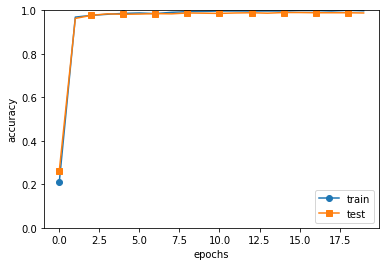

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()